In [36]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings    # 경고메시지 제외
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.formula.api import ols
import scipy.stats as spst
warnings.filterwarnings(action='ignore')

plt.rc('font', family='NanumGothic')
sns.set(font="NanumGothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

df = pd.read_csv('./final_dataset.csv')

In [37]:
# 필요없는 column 제거
df.drop(columns=['Unnamed: 0', 'idx', 'year'], inplace=True, axis=1)
# 범주형 데이터 처리
df_d = pd.get_dummies(df, columns=['date', 'hour'])

In [38]:
df_d_time_df = df_d.copy()

In [39]:
df_d_time_df['DT'] = df_d_time_df['original_time']
df_d_time_df.set_index('DT', inplace=True)
df_d_time_df.tail()

,spend_time,original_time,서울기온(°C),서울강수량(mm),서울풍속(m/s),서울습도(%),서울이슬점온도(°C),서울일조(hr),서울일사(MJ/m2),서울시정(10m),...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
DT,,,,,,,,,,,,,,,,,,,,,
2021-09-24 20:00:00,301.1,2021-09-24 20:00:00,23.3,0.0,3.1,63,15.8,0.0,0.00,2000,...,0,0,0,0,0,0,1,0,0,0
2021-09-24 21:00:00,315.4,2021-09-24 21:00:00,22.4,0.0,3.0,66,15.7,0.0,0.00,2000,...,0,0,0,0,0,0,0,1,0,0
2021-09-24 22:00:00,329.7,2021-09-24 22:00:00,21.6,0.0,3.8,69,15.6,0.0,0.00,2000,...,0,0,0,0,0,0,0,0,1,0
2021-09-24 23:00:00,312.2,2021-09-24 23:00:00,20.9,0.0,3.3,70,15.2,0.0,0.00,2000,...,0,0,0,0,0,0,0,0,0,1
2022-09-10 12:00:00,0.0,2022-09-10 12:00:00,26.0,0.0,2.0,45,13.2,0.3,1.23,2000,...,0,0,0,0,0,0,0,0,0,0


In [40]:
target_df = df_d_time_df[840:]

In [41]:
df_d_time_df = df_d_time_df[:840]

In [16]:
from sklearn.model_selection import train_test_split

target = 'spend_time'
x = df_d_time_df.drop([target, 'original_time'], axis=1)
y = df_d_time_df.loc[:, target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [43]:
target_df.drop(columns=['spend_time', 'original_time'], inplace=True)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import * 

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

print('RMSE : ', round(mean_squared_error(y_test, lr_pred, squared=False), 5))
print('MAE  : ', round(mean_absolute_error(y_test, lr_pred), 5))
print("r2_score 점수 : {:.3f}".format(r2_score(y_test,lr_pred)))

RMSE :  34.70851
MAE  :  28.55358
r2_score 점수 : 0.558


In [46]:
lr_pred

array([326.00935565])

In [64]:
def prediction_plot(pred_model):
  plt.figure(figsize = (20,8))
  plt.plot(y_test, label = 'val')
  plt.plot(pred_model, label = 'pred')

  plt.legend()
  plt.grid()
  plt.show()

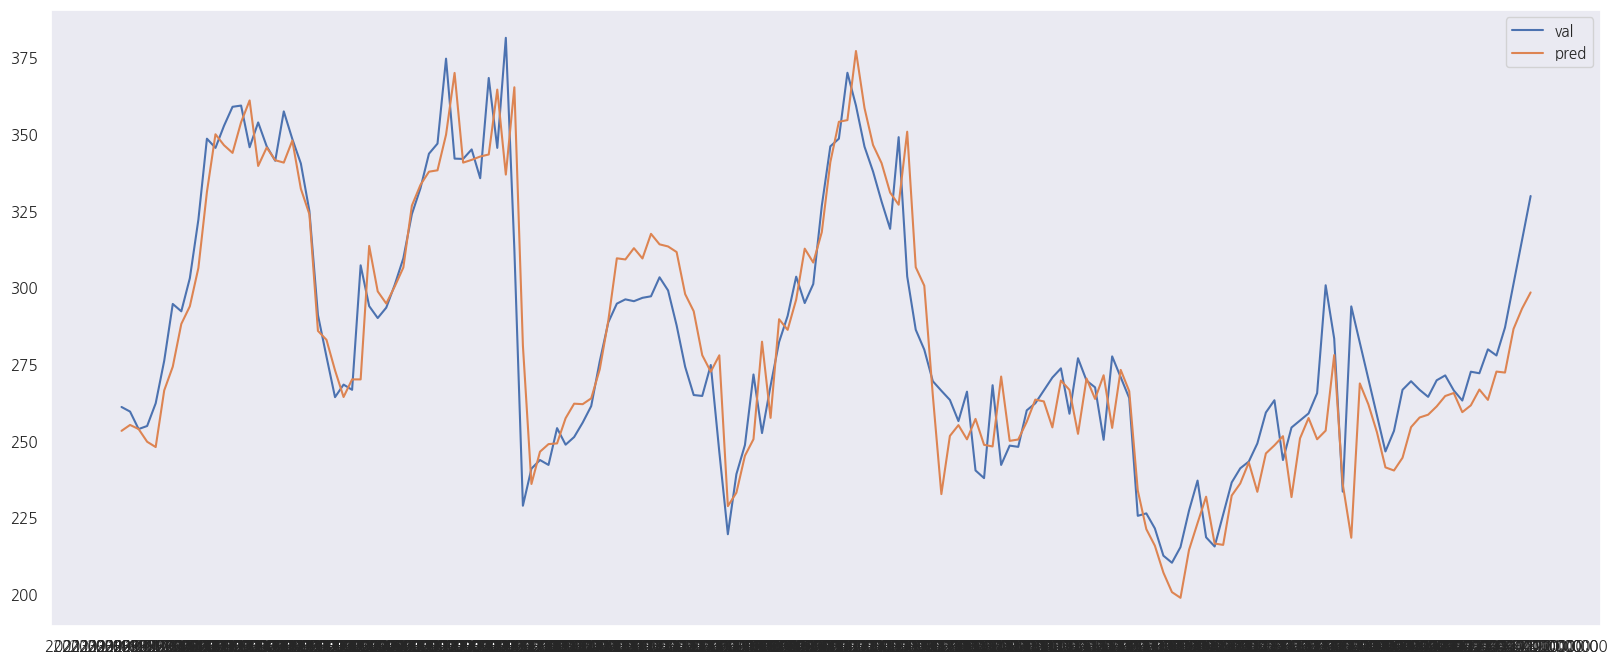

In [65]:
prediction_plot(lr_pred)